In [1]:
## ######################################################################
## LEMON SQUEEZING
## The idea is that we have an outcome/dependent variable which is a proportion between [0, 1]
## e.g. for my project, it is the percent of the population living in extreme poverty
## We want to use covariates to complete the poverty series, we use a logit transformation 
## to bound between 0 and 1, but this drops our zeros! Not good! 
## So we consider offsets - add a very small number uniformly to all values
## And we consider "lemon squeezing" - add a very small number to the extremes
## and as we move towards 50% from the extremes, we add less and less, ie 50% stays the same
## This is a technique mentioned in this paper: http://www.ncbi.nlm.nih.gov/pubmed/16594767
## "A Better Lemon Squeezer? Maximum-Likelihood Regression With Beta-Distributed Dependent Variables"
## Transform observation on the [0,1] interval to a variable in the open (0,1) interval by the weighted average:
## y_new = [y(N – 1) + s]/N
## s = 0.5; N = sample size
## ######################################################################

%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [15]:
## Generate some data

# Want something between 0 and 1, inclusive of 0 and 1
outcome = np.random.uniform(0,1,1000)  
covariate = outcome + 0.1 * np.random.uniform(0,1,1000)  # Make up a fake covariate that is predictive of the outcome

# Make a few zeros
indexes = [0,1,13,53,55,120,234,345,546,777,888,900,999] # is there a better way to do this? 

# put the zeros into the outcome array
for (index, replacement) in zip(indexes, replacements):
    outcome[index] = 0
    
# Count how many zeros
N = 1000
N - np.count_nonzero(outcome)

1

In [3]:
# What is this weird lemon multiplier at 0%
(0*(N - 1) + 0.5) / N

0.0005

In [4]:
# What is this weird lemon multiplier at 25%
(0.25*(N - 1) + 0.5) / N

0.25025

In [5]:
# What is this weird lemon multiplier at 50%
(0.5*(N - 1) + 0.5) / N

0.5

In [6]:
# Look at the lemon transformation in level space
lemon_outcome = (outcome * (N - 1) + 0.5) / N
diff = lemon_outcome - outcome

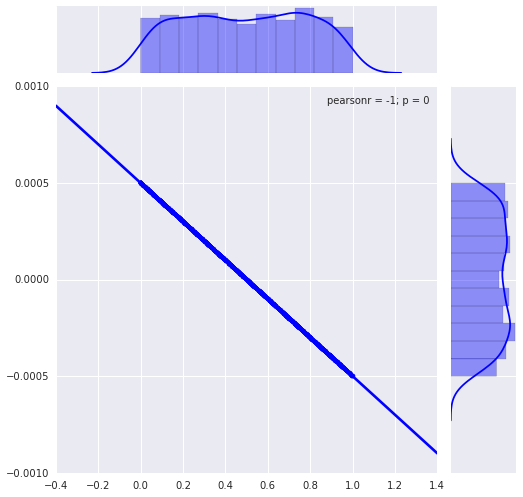

In [7]:
# Look at the outcome versus lemon_outcome - outcome
sns.jointplot(x=outcome, y=diff, kind="reg", color="b", size=7)

In [8]:
# Take a logit of our lemon-squeezed outcome variable 
logit_lemon_outcome = sc.special.logit((outcome * (N - 1) + 0.5)/ N)

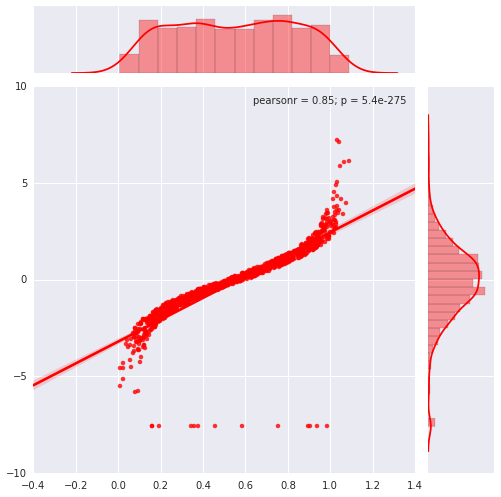

In [9]:
# Look at the relationship between the lemon-squeezed outcome and a predictive covariate
sns.jointplot(x=covariate, y=logit_lemon_outcome, kind="reg", color="r", size=7)

In [10]:
# Generate a logit transformation of our variable with an offset for comparison  
logit_outcome = sc.special.logit(outcome + 0.000001)

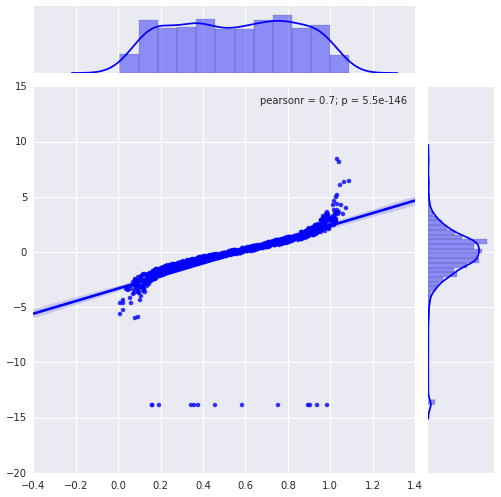

In [11]:
# Look at the relationship between the logit(outcome + offset) and a predictive covariate
sns.jointplot(x=covariate, y=logit_outcome, kind="reg", color="b", size=7)

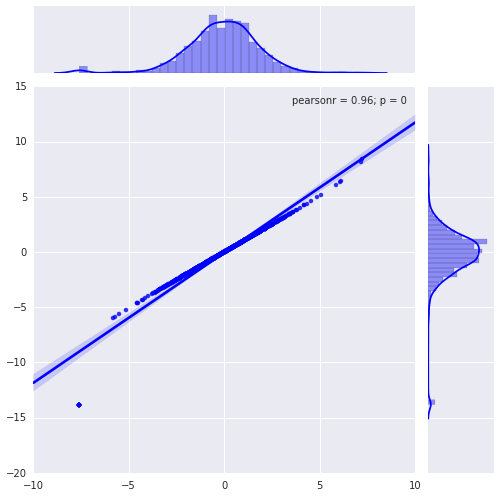

In [12]:
# Look at the relationship between the logit(outcome + offset) and a predictive covariate
sns.jointplot(x=logit_lemon_outcome, y=logit_outcome, kind="reg", color="b", size=7)